# Mini-Capstone

## Objective

The objective of this project is to predict rain based on Australian weather data from https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package.

The output (label) is `RainTomorrow`.

## Importance

Climate change is the world's greatest challenge after catastrophic reports from the IPCC - https://www.ipcc.ch/report/ar6/wg3/.

Predicting rain is critical for the agriculture industry, especially the wine industry which is very strong in Australia.

It is also critical for controlling fires, especially after the recent bushfire crisis - https://disasterphilanthropy.org/disasters/2019-australian-wildfires/.

## Imports

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Read weather data

First, we are opening and reading `weatherAUS.csv` and observing columns and row data.

In [143]:
weather_data = pd.read_csv("weatherAUS.csv")

In [144]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [145]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Filter on location

It seems improbable that accurate weather predictions can be made for `Darwin` based on data from `Sidney`, so we need to filter on location.

In [146]:
print(weather_data['Location'].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [147]:
location = "Darwin"
local_data = weather_data[weather_data["Location"] == location]
local_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
139111,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,81.0,32.0,1016.0,1012.1,1.0,2.0,25.4,32.3,No,No
139112,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,81.0,17.0,1016.8,1012.4,1.0,1.0,24.3,31.9,No,No
139113,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,38.0,24.0,1017.2,1013.0,0.0,1.0,24.3,31.2,No,No
139114,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,55.0,16.0,1017.3,1013.6,2.0,6.0,21.3,29.8,No,No
139115,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,37.0,16.0,1016.3,1012.6,1.0,1.0,22.2,29.6,No,No


## Plot data

Plotting feature data gives a sense of patterns

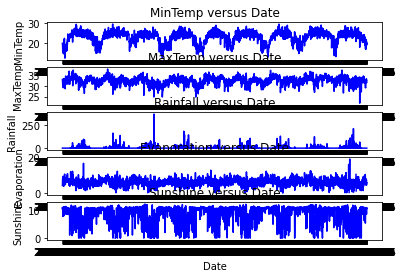

In [148]:
x_column = "Date"
features = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine"]

fig, axs = plt.subplots(len(features))

for i, y_column in enumerate(features):
    axs[i].plot(local_data[x_column], local_data[y_column], color="blue")
    axs[i].set(title = y_column + " versus " + x_column, xlabel = x_column, ylabel = y_column)

Plotting labels shows the proportions

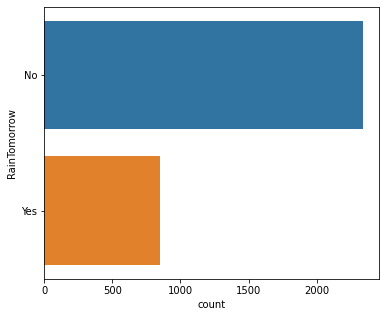

In [149]:
label = "RainTomorrow"
fig , ax = plt.subplots(figsize = (6,5))
ax = sns.countplot(y = label, data=local_data )

Correlation between features helps select a subset.

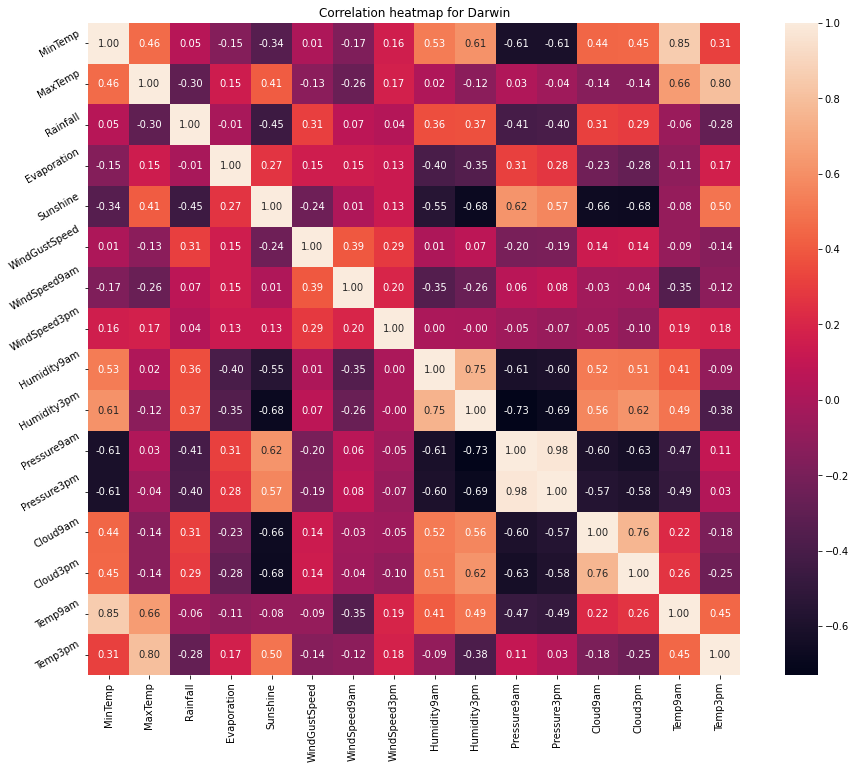

In [150]:
# Checking for correlation between the variables:
correlation = local_data.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation heatmap for ' + location)
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()


## Find and drop missing data

Let's first look at missing data

([<matplotlib.patches.Wedge at 0x245704d17b0>,
 [Text(-1.0984477939856452, 0.058416126951980694, 'Non NaN elements'),
  Text(1.398024467682992, -0.07434774885419754, 'NaN elements')])

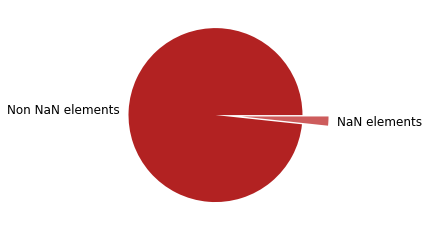

In [151]:
explodes = (0,0.3)
y_column = features[3]
plt.pie(local_data[y_column].isna().value_counts(),explode=explodes,startangle=0,colors=['firebrick','indianred'],
  labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 12})

# fig, axs = plt.subplots(len(features))
# for i, y_column in enumerate(features):
#     axs[i].pie(local_data[y_column].isna().value_counts(), explode=(0,0.3), startangle=0, colors=['firebrick','indianred'],
#         labels=['Non NaN elements','NaN elements'], textprops={'fontsize': 12})

Then lets drop all rows with Infinity, null or NaN values

In [152]:
print(len(local_data))
local_data = local_data.replace([np.inf, -np.inf], np.nan)
local_data = local_data.dropna(subset= features + [label])
local_data = local_data.reset_index(drop=True)
print(len(local_data))
# print(np.any(np.isnan(local_data)))
# print(np.all(np.isfinite(local_data)))

3193
3135


Check that labels are clean.

In [153]:
print(local_data[label].unique())

['No' 'Yes']


## Extract year, month, day

In [155]:
local_data = local_data.reset_index(drop=True)
local_data.Date = pd.to_datetime(local_data.Date)
# local_data.RainTomorrow = local_data.RainTomorrow == "Yes"
local_data.RainTomorrow = local_data.RainTomorrow.map({ "Yes": int(1),  "No": int(0) })
YEAR = []
MONTH = []
DAY = []
RAIN_TOMORROW = []
for i in range(len(local_data)):
    DAY.append(local_data.Date[i].day)
    MONTH.append(local_data.Date[i].month)
    YEAR.append(local_data.Date[i].year)
local_data['Year'] = YEAR
local_data['Month'] = MONTH
local_data['Day'] = DAY 
local_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,1012.1,1.0,2.0,25.4,32.3,No,0,2008,7,1
1,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,1012.4,1.0,1.0,24.3,31.9,No,0,2008,7,2
2,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,1013.0,0.0,1.0,24.3,31.2,No,0,2008,7,3
3,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,1013.6,2.0,6.0,21.3,29.8,No,0,2008,7,4
4,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,1012.6,1.0,1.0,22.2,29.6,No,0,2008,7,5


## Show one year

In [156]:
def get_timeseries(year):
    year_data = local_data[local_data.Year == year].reset_index(drop=True)
    return year_data
get_timeseries(2008).head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,E,41.0,ENE,...,1012.1,1.0,2.0,25.4,32.3,No,0,2008,7,1
1,2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,ENE,50.0,SE,...,1012.4,1.0,1.0,24.3,31.9,No,0,2008,7,2
2,2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,E,46.0,ESE,...,1013.0,0.0,1.0,24.3,31.2,No,0,2008,7,3
3,2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,E,44.0,SE,...,1013.6,2.0,6.0,21.3,29.8,No,0,2008,7,4
4,2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,ESE,46.0,E,...,1012.6,1.0,1.0,22.2,29.6,No,0,2008,7,5


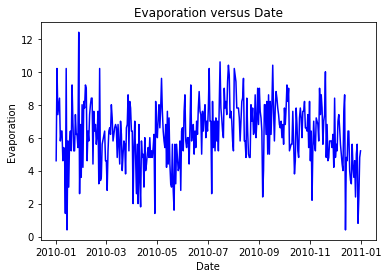

In [157]:
#plot raw data
year = 2010
year_data = get_timeseries(year)
# plt.scatter(x=local_data[x_column], y=local_data[y_column], color="blue")
plt.plot(year_data[x_column], year_data[y_column], color="blue")
plt.title(y_column + " versus " + x_column)
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()

## Create training and testing data

In [158]:
# data = year_data
data = local_data.reset_index(drop = True)

In [159]:
# Create training and testing data
from sklearn.model_selection import train_test_split
X = data[["Month", "Day"] + features]
print(np.any(np.isnan(X)))
print(np.all(np.isfinite(X)))
y = data.RainTomorrow
print(np.any(np.isnan(y)))
print(np.all(np.isfinite(y)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

False
True
False
True


In [160]:
X_train.head()

,Month,Day,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine
493,11,23,27.4,33.8,0.6,7.4,9.0
1184,11,22,25.9,32.4,1.8,8.4,9.5
2901,10,18,26.3,34.0,0.0,8.0,7.8
113,10,22,26.0,37.5,0.0,7.6,11.4
2821,7,30,18.8,33.6,0.0,8.2,11.0


In [161]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

## Train and test neural network with MLPClassifier

In [162]:
# Set random seed
np.random.seed(0)

# Train neural network
from sklearn.neural_network import MLPClassifier
NN_model_classify = MLPClassifier(alpha=0.5, hidden_layer_sizes=(7, 6, 7), activation='relu', max_iter=500, random_state = 0)
NN_model_classify.fit(X_train, y_train)

MLPClassifier(alpha=0.5, hidden_layer_sizes=(7, 6, 7), max_iter=500,
              random_state=0)

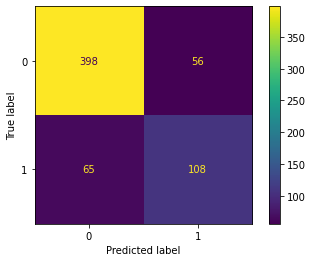

In [171]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize predictions vs. true values for test set
ConfusionMatrixDisplay.from_estimator(NN_model_classify, X_test, y_test)
plt.show()

In [164]:
from sklearn.metrics import classification_report

# Make digit predictions on test set
y_pred = NN_model_classify.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       454
           1       0.66      0.62      0.64       173

    accuracy                           0.81       627
   macro avg       0.76      0.75      0.75       627
weighted avg       0.80      0.81      0.81       627



In [165]:
from sklearn.model_selection import cross_val_score
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

# Define cross validatation function (and ignore convergence warnings)
@ignore_warnings(category=ConvergenceWarning)
def cross_validate_alpha(alphas,layers,activations,X_train, y_train):
  # For each alpha being tested, perform cross validation
  for alpha in alphas:
    for layer in layers:
      for activation in activations:    
        NN_model_classify = MLPClassifier(alpha=alpha, hidden_layer_sizes=layer, activation=activation, max_iter=50, random_state=42)
        # Apply cross validation to compute 4 scores (one for each held out portion of the training set)
        score = cross_val_score(NN_model_classify, X_train, y_train, cv=4)
        # Report average score
        print("With alpha = %s, layers = %s, and activation =%s, average cross validation score of %s" % (alpha, str(layer), activation, np.mean(score)))

# Feel free to add addition values to any of these lists to test
alphas = [0.0,0.1,0.5,]
layers = [(8,9,4),(7,6,7),(3,2),(5,4)]
activations = ['logistic', 'relu']

cross_validate_alpha(alphas,layers,activations,X_train,y_train)

With alpha = 0.0, layers = (8, 9, 4), and activation =logistic, average cross validation score of 0.7412280701754387
With alpha = 0.0, layers = (8, 9, 4), and activation =relu, average cross validation score of 0.8058213716108453
With alpha = 0.0, layers = (7, 6, 7), and activation =logistic, average cross validation score of 0.7412280701754387
With alpha = 0.0, layers = (7, 6, 7), and activation =relu, average cross validation score of 0.8054226475279106
With alpha = 0.0, layers = (3, 2), and activation =logistic, average cross validation score of 0.7978468899521531
With alpha = 0.0, layers = (3, 2), and activation =relu, average cross validation score of 0.7934609250398724
With alpha = 0.0, layers = (5, 4), and activation =logistic, average cross validation score of 0.7412280701754387
With alpha = 0.0, layers = (5, 4), and activation =relu, average cross validation score of 0.7878787878787878
With alpha = 0.1, layers = (8, 9, 4), and activation =logistic, average cross validation sco

In [170]:
# Train neural network
from sklearn.tree import DecisionTreeClassifier
NN_model_decision = DecisionTreeClassifier(max_depth=20, criterion='entropy', random_state=0)
NN_model_decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=0)

## Train and test neural network with RandomForestClassifier

In [166]:
# Train neural network
from sklearn.ensemble import RandomForestClassifier
NN_model_forest = RandomForestClassifier(max_depth=20,n_estimators=1400,criterion='entropy', random_state=0)
NN_model_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=1400)

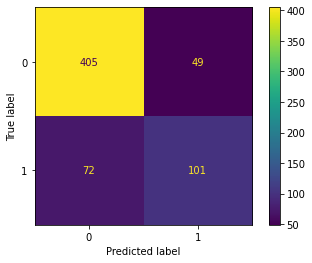

In [167]:
from sklearn.metrics import ConfusionMatrixDisplay

# Visualize predictions vs. true values for test set
ConfusionMatrixDisplay.from_estimator(NN_model_forest, X_test, y_test)
plt.show()

In [168]:
# Make digit predictions on test set
y_pred = NN_model_forest.predict(X_test)
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       454
           1       0.67      0.58      0.63       173

    accuracy                           0.81       627
   macro avg       0.76      0.74      0.75       627
weighted avg       0.80      0.81      0.80       627

